<b>Logistic Regression with Python</b>

<b>Learning objects</b>
- Understand Logistic Regression (LR) as a classification technique.
- Perform Exploratory Data Analysis (EDA) on a dataset.
- Clean and prepare a dataset for binary classification model-building.
- Perform binary LR on a dataset to enhance understanding of the concept.

<b>Outline</b>
- What is logistic regression?
- Mathematical function of logistic regression.
- EDA of the Pima Indians dataset.
- Practical application of logistic regression on a dataset.

<b>Introduction to Logistic Regression</b>
- Classification is one of the most important areas of supervised machine learning (ML), and logistic regression is one of its basic methods.
- Classification tries to predict in which class or category some entity belongs to, based on its features.
- Briefly, LR is not applied for regression problems but instead for classification problems.
- Binary LR models/predicts the probabilities for classification problems with two possible outcomes.
- It is an extension of the linear regression model for classification problems.
- The name ‘Regression’ indicates that a logistic function is applied to a linear combination of features to predict the outcome of a categorical dependent variable based on predictor variables.
- The outputs of regression problems are continuous and largely unbounded outputs. 
- An everyday example is estimating the price of a house based on its features such as the number of bedrooms, number of bathrooms, size of plot and location within a city.
- In contrast, classification problems have discrete and finite outputs which we call classes or categories.
- For example, predicting if an individual is likely to develop diabetes or not based on physiological factors such blood pressure, weight and height.<p>
    
<b>Types of classification</b>    
- Binary or binomial classification: only two classes to choose between (usually 0 and 1, True and False, success or failure, or positive and negative).
- Multiclass or multinomial classification: three or more classes to choose from.<p>
    
<b>Types of Logistic Regression</b>
- Binary logistic regression is the statistical technique used to predict the relationship between the dependent variable (y) and the independent variable (X). This is the most common type of LR (95% of all LR cases involve it).
- It's what we will focus on in this 'train'.
- Multinomial logistic regression is used when you have one categorical dependent variable with two or more unordered levels (i.e two or more discrete outcomes).
- It is very similar to logistic regression except that here you can have more than two possible outcomes. 
 

<b>LR assumptions</b>
- Binary LR requires the dependent variable to be binary/dichotomous.
- No outliers should exist in the data.
- There should be no high correlations (multicollinearity) among the predictors: this can be assessed by a correlation matrix among the predictors.
- LR requires large sample sizes.


<b>Mathematics of LR</b>
- The LR model uses the logistic function to squeeze the output of a linear equation between 0 and 1.
- The logistic function, also called the sigmoid function, is represented mathematically as:<p>
    
$\text{logistic}(\eta) = \frac{1}{1 + exp(-\eta)}$
    
- Let's do some bit of coding to see the profile of a logistic function.

In [1]:
# Import some libraries we will use in the exercise.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Define a logistic function.
def log_function(n):
    values = 1 / (1 + np.exp(-n)) # Mathematical implementation of the logistic function.
    return(values) # Return/store the result of the calculation

In [3]:
# Example
log_function(4)

0.9820137900379085

In [4]:
# Store the variables we will use to plot our custom function.
log_values = [] # Create empty list to hold the 'y-values'.
num_list = np.arange(-11, 11, 1) # Container for 'x-values'
for i in num_list:             # Loop through the x-values
    log_values.append(log_function(i))  # Append the calculated values to the empty list
print(log_values) # As a sanity check.

[1.670142184809518e-05, 4.5397868702434395e-05, 0.00012339457598623172, 0.0003353501304664781, 0.0009110511944006454, 0.0024726231566347743, 0.0066928509242848554, 0.01798620996209156, 0.04742587317756678, 0.11920292202211755, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8807970779778823, 0.9525741268224334, 0.9820137900379085, 0.9933071490757153, 0.9975273768433653, 0.9990889488055994, 0.9996646498695336, 0.9998766054240137, 0.9999546021312976]


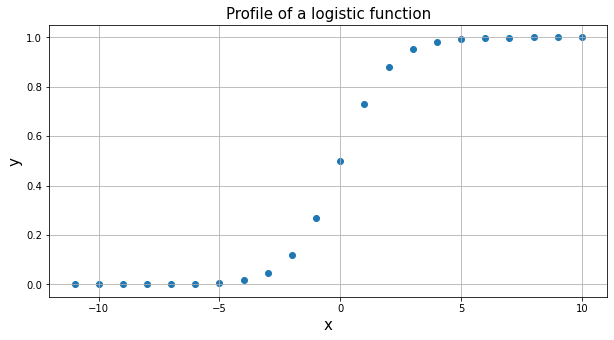

In [5]:
# Plot the logistic/ 'S' function.
plt.figure(figsize = (10, 5)) # Specify figure size.
plt.scatter(num_list, log_values) # Plot the dependent against the independent.
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title('Profile of a logistic function', fontsize = 15)
plt.grid()# Insert a grid.
plt.show()

<b>Discussion</b>
- The function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1.
- If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0.
- The profile is symmetrical about x = 0.
- At x = 0, y is valued at 0.5.
- If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.
- As an exercise, change the range to any other values and see how the profile stays constant or changes!

<b>Binary logistic regression on an actual dataset</b>
- Binary LR will be performed on a real-life dataset.
- The dataset is the 'Pima Indians'.
- It can be found on the link https://www.kaggle.com/uciml/pima-indians-diabetes-database and other sources such as the url we will use here.<p>

<b>Dataset description</b>
- The data was initially collected by the National Institute of Diabetes and Digestive and Kidney Diseases. 
- The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements-the predictors. 
- All patients are females of Pima Indian heritage.
- They are of age 21 and above.
- The datasets consists of several medical predictor variables and one target variable, Outcome. 
- The predictor variables include blood pressure, the body mass index (BMI), insulin level, age, and so on.

In [6]:
# You can download the dataset to your drive and use it or access a url that contains the same dataset.
url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv' # url access
pima_df = pd.read_csv(url) # Create a Pandas dataframe.
pima_df.head() # Check/view the first few rows of the dataframe.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# You can check the last rows as well.
pima_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


- At a glance, the dataframe has 768 rows and 9 rows.
- Remember Python uses zero indexing.
- We can confirm our observations by producing a Pandas summary of the statistics.

In [8]:
# Summary statistics.
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Confirm the shape of dataframe (rows and columns).
pima_df.shape

(768, 9)

In [10]:
# Check for missing values.
pima_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# You can get more details about the dataset.
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Our dataframe has 768 'non-null' entries of type 'int64' and 'float64'.
- We do not have 'string' entries.
- We also do not have NaN or Null entries.

In [12]:
# Re-name the columns for convenience
pima_df.rename(columns = {'Pregnancies':'Preg', 'BloodPressure':'BP', 'SkinThickness':'Skin', 'DiabetesPedigreeFunction':'DPF', 'Outcome':'Class'}, inplace = True)
pima_df.head()

,Preg,Glucose,BP,Skin,Insulin,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# Check 'Class' distributions.
pima_df['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

- Checking classes helps us verify if our dataset is 'balance'.
- Clearly, ours is not as there are 500 Class 0 and 268 Class 1 entries.
- It is generally good practise to balance the dataset before building models using the data.
- We will use a simple balancing technique.
- We can upsample to increase the 'minority' class samples to equal the 'majority' class.
- You can also downsample the 'majority' class by reducing its sample size to match the 'minority' class.
- In data science, we prefer bigger sample size and so it is recommended to upsample.

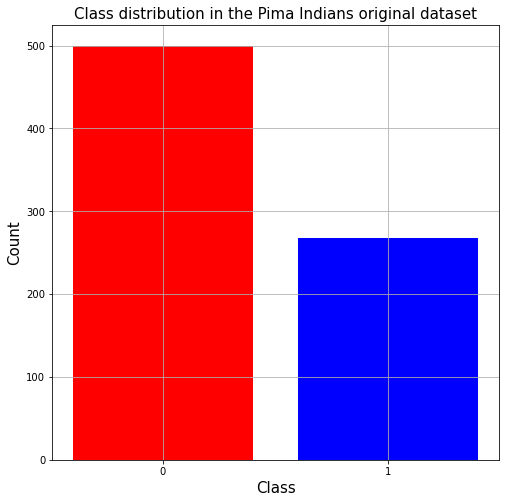

In [14]:
# Visually check the class distributions
labels, counts = np.unique(pima_df['Class'], return_counts = True)
colors = ['r', 'b']
plt.figure(figsize = (8, 8))
plt.bar(labels, counts, color = colors)
plt.gca().set_xticks(labels)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Class distribution in the Pima Indians original dataset', fontsize = 15)
plt.grid()
plt.show()

<b>Upsampling</b>
- Now let's do some upsampling to balance our dataset.
- Use the sklearn library 'resample'

In [15]:
pima_majority = pima_df[pima_df.Class == 0]
pima_minority = pima_df[pima_df.Class == 1]

In [16]:
# Perform the upsampling and create a new balanced dataframe.
from sklearn.utils import resample # Library for resampling.
pima_upsampled = resample(pima_minority, replace = True, n_samples = 500, random_state = 1)

pima_df_upsampled = pd.concat([pima_majority, pima_upsampled]) # Concatenate the two lists.
pima_df_upsampled.Class.value_counts() # Check the new dataframe for balance.

0    500
1    500
Name: Class, dtype: int64

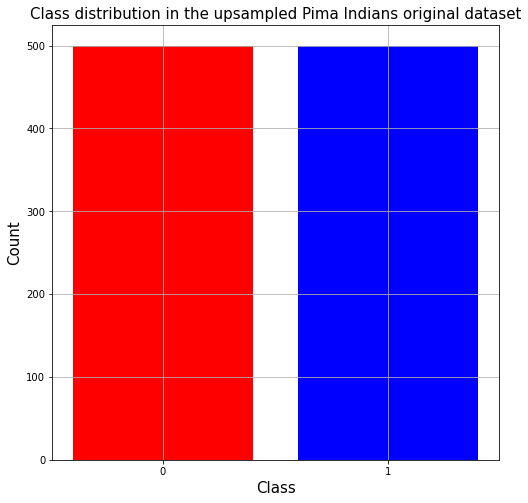

In [17]:
# Visually inspect the changes.
# Visually check the class distributions
labels, counts = np.unique(pima_df_upsampled['Class'], return_counts = True)
colors = ['r', 'b']
plt.figure(figsize = (8, 8))
plt.bar(labels, counts, color = colors)
plt.gca().set_xticks(labels)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Class distribution in the upsampled Pima Indians original dataset', fontsize = 15)
plt.grid()
plt.show()

In [18]:
pima_df_upsampled.describe()

,Preg,Glucose,BP,Skin,Insulin,BMI,DPF,Age,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.009000,125.108000,69.455000,20.651000,82.540000,32.853800,0.486708,33.797000,0.50000
std,3.491004,33.270817,20.407019,16.591217,118.334363,7.848716,0.338446,11.416748,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.00000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,28.000000,0.249000,24.750000,0.00000
50%,3.000000,121.000000,72.000000,23.000000,7.000000,32.800000,0.379000,31.000000,0.50000
75%,6.000000,146.000000,80.000000,33.000000,140.000000,37.400000,0.652000,41.000000,1.00000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.00000


- We now have a total of 1000 entries.
- The number of samples in our dataframe has increased and we have a balanced dataset.
- Let's continue with our Exploratory Data Analysis (EDA) by visualizing the data.

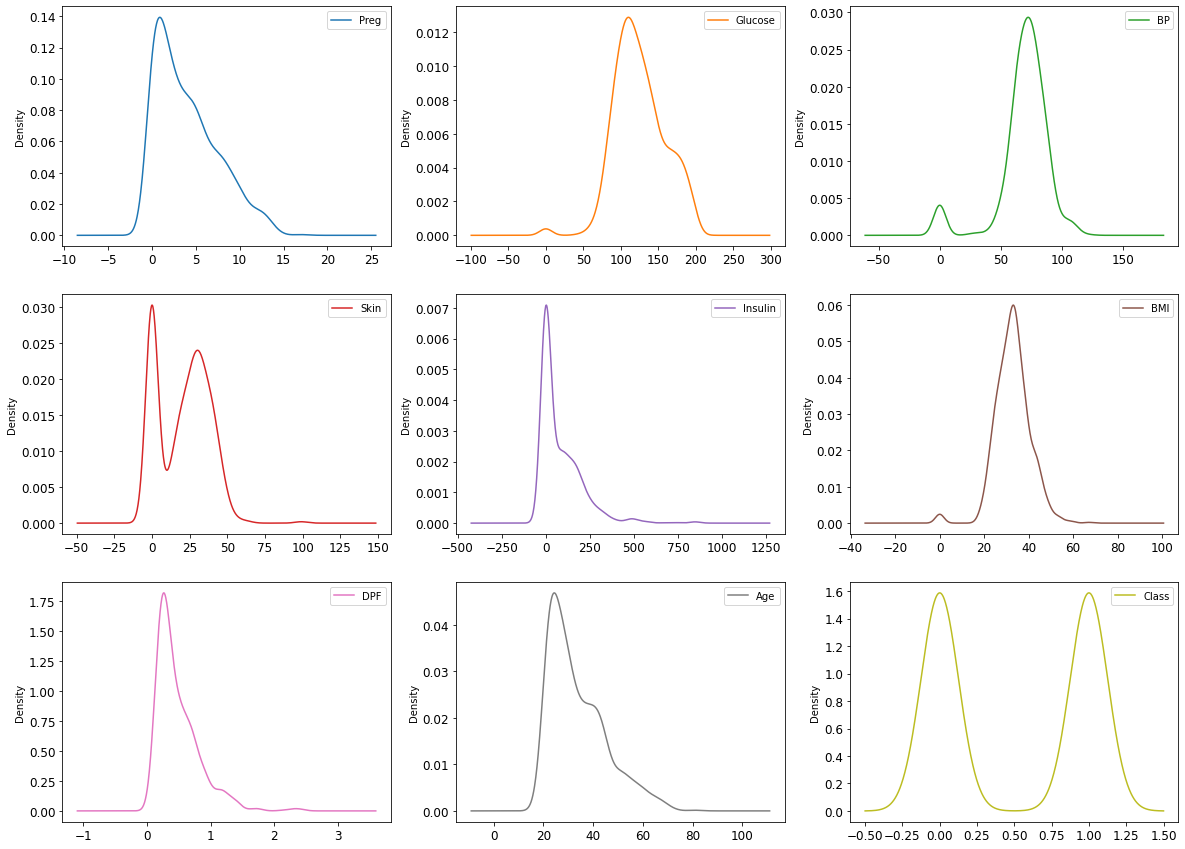

In [19]:
# Using density plots (kde) on the attributes to visualize the distribution of each attribute.
pima_df_upsampled.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False, fontsize = 12)
plt.show()

- Only the BMI profile shows a clear 'Bell curve'-the characteristic of a normally distributed variable.
- The Class profile shows two distinct peaks representative of the two classes in the dataset.
- As stated in the introduction, LR works well if the collinearity between variables is low.
- Let's check the Pearson's correlation coeffcients between our attributes.

In [20]:
# Correlation coefficient closer to 1 indicate a very high correlation.
corr_matrix_pearson = pima_df_upsampled.corr(method='pearson')
corr_matrix_pearson

,Preg,Glucose,BP,Skin,Insulin,BMI,DPF,Age,Class
Preg,1.000000,0.069300,0.162301,-0.097799,-0.086141,0.001279,-0.019582,0.540280,0.203768
Glucose,0.069300,1.000000,0.119787,0.052757,0.310797,0.220219,0.117241,0.224756,0.454920
BP,0.162301,0.119787,1.000000,0.220808,0.123184,0.267225,0.024309,0.244566,0.062314
Skin,-0.097799,0.052757,0.220808,1.000000,0.447355,0.353301,0.177821,-0.096481,0.059519
Insulin,-0.086141,0.310797,0.123184,0.447355,1.000000,0.162907,0.181610,-0.007164,0.116237
BMI,0.001279,0.220219,0.267225,0.353301,0.162907,1.000000,0.131615,0.037625,0.325005
DPF,-0.019582,0.117241,0.024309,0.177821,0.181610,0.131615,1.000000,0.042301,0.168424
Age,0.540280,0.224756,0.244566,-0.096481,-0.007164,0.037625,0.042301,1.000000,0.228463
Class,0.203768,0.454920,0.062314,0.059519,0.116237,0.325005,0.168424,0.228463,1.000000


- A variable will have coeficient of 1 with itself.
- Otherwise, the highest value between different variable is 0.54 which indicates a moderate correlation between the Age and Preg.

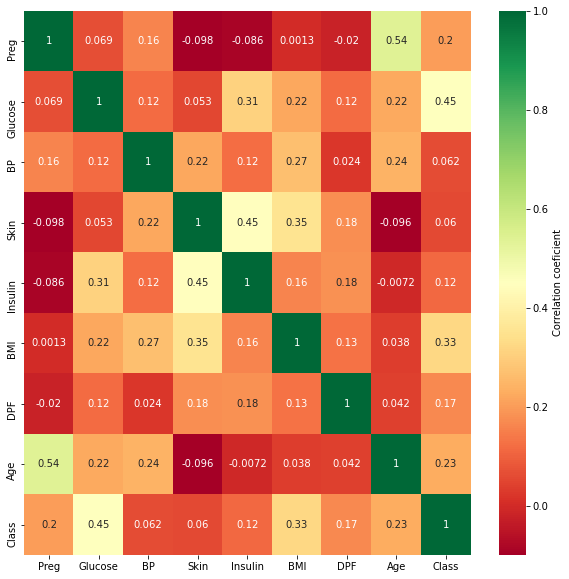

In [21]:
# Visualize the correlation.
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix_pearson, annot = True, cmap='RdYlGn', cbar_kws={'label': 'Correlation coeficient'})
plt.show()

- LR and Tree based algorithms such as Decision Tree, Random forest and gradient boosting, are not sensitive to the magnitude of variables. 
- Standardization is unnecessary/optional when fitting these models.
- If you opt to standardize apply the standardizer to the train and test data separately.
- This mitigates information bleeding from the test data into the train data.

In [22]:
# Split the dataset into features and target variable.

X = pima_df_upsampled[pima_df_upsampled.columns[0:8]] # Features

y = pima_df_upsampled[pima_df_upsampled.columns[-1]] # Target variable

In [23]:
# Check the features.
X.describe()

,Preg,Glucose,BP,Skin,Insulin,BMI,DPF,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.009000,125.108000,69.455000,20.651000,82.540000,32.853800,0.486708,33.797000
std,3.491004,33.270817,20.407019,16.591217,118.334363,7.848716,0.338446,11.416748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,28.000000,0.249000,24.750000
50%,3.000000,121.000000,72.000000,23.000000,7.000000,32.800000,0.379000,31.000000
75%,6.000000,146.000000,80.000000,33.000000,140.000000,37.400000,0.652000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [24]:
# Check the target/label variable.
y.describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Class, dtype: float64

<b>Train-test split</b>
- We split the dataset into two parts in a ratio of 75:25. 
- 75% of the data will be used for model training and the other 25% for model testing.
- Another common ratio is 67:37.
- We also set a random seed to ensure reproduciblity.
- Specifying the random seed we ensure we get the same random numbers each time we run the code and in turn the same split of data.
- This is vital in obtaining a benchmark we can compare to other machine learning algorithms or the same algorithm with a different configuration.
- We can be certain that one algorithm performs better than the other because they would have been trained and tested on exactly the same data.
- The train-test split is very fast, simple and is suitable for large datasets with millions of entries.
- Its main disadvantage is that it can have a high variance.
- This means the differences in the training and test dataset can result in significant differences in the estimate of the accuracy.

In [25]:
# Split features (X) and labels (y) into training and testing sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.25,random_state = 0)

In [26]:
# Check the subset shapes after the split.
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(750, 8)

(250, 8)

(750,)

(250,)

<b>Model implementation and evaluation</b>
- Now define the model.
- Proceed to fit the model and analyze the results. <p>
    
<b>Principal Component Analysis (PCA)</b>
- The goal of a PCA is to identify patterns in data so to identify features relevant to the model building exercise.
- PCA aims to detect the correlation between variables.
- If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense.
- Our variables show a moderate correlation (0.54 is the highest) so there is no need to perform PCA.<p>

<b>The Classification Report</b>
- We can identify the relevant attributes using another method that is statistics-based, the Classification Report.
- This displays the precision, recall, F1-score and support for each class in the dataset.

In [27]:
# Import the relevant model.
import statsmodels.api as sm
# Define the model.
logit_model = sm.Logit(y,X)

# Fit the model.
results = logit_model.fit()
# Print the results.
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.632114
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Tue, 29 Jun 2021   Pseudo R-squ.:                 0.08805
Time:                        12:13:35   Log-Likelihood:                -632.11
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 2.843e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Preg           0.1251      0.024      5.171      0.000       0.078       0.173
Glucose        0.0131      0.

- This model can explain about 63% of the variation in dependent variable. 
- Variables that influence the outcome should have a p-value less than 0.05
- To identify the attributes to be eliminated check the table column ' P>|z|'.
- Skin, Insulin, BMI, DPF are attributes to be eliminated in the next model. 

In [28]:
X_new = X[['Preg', 'Glucose', 'BP', 'Age']]

In [29]:
# Verify that the 'irrelevant' columns have been edited out.
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 730
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Preg     1000 non-null   int64
 1   Glucose  1000 non-null   int64
 2   BP       1000 non-null   int64
 3   Age      1000 non-null   int64
dtypes: int64(4)
memory usage: 39.1 KB


In [30]:
# Define the new model.
logit_model_new = sm.Logit(y,X_new)

# Fit the model.
results_new = logit_model_new.fit()

# Print the results.
print(results_new.summary())

Optimization terminated successfully.
         Current function value: 0.635324
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Tue, 29 Jun 2021   Pseudo R-squ.:                 0.08342
Time:                        12:13:35   Log-Likelihood:                -635.32
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 6.681e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Preg           0.1199      0.024      5.023      0.000       0.073       0.167
Glucose        0.0157      0.

- The model converged and can explain 63.53% of the variation.
- This is a marginal increase from the first model.
- The p-values of the remaining variables are all below 0.05 as required.
- Despite the modest gain, it is still good practise to perform feature elimination/selection.

In [31]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression(max_iter=1000) # Add some maximum iterations that will allow the model to converge.

logreg.fit(X_new, y)

# Defining the y_pred variable for the predicting values. 
y_pred=logreg.predict(X_new)

# Calculating the precision of the model
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       500
           1       0.73      0.67      0.70       500

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



<b>Discussion</b>
- The model's classification rate or precision is 71%- which is good accuracy.
- The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
- The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
- When our Logistic Regression model predicted patients are going to suffer from diabetes, those patients have diabetes 71% of the time.
- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
- The recall is intuitively the ability of the classifier to find all the positive samples.
- If there are patients who have diabetes in the test set and our Logistic Regression model can identify it 71% of the time.
- The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
- The support is the number of occurrences of each class in y_test. (ref: https://scikit-learn.org/stable/user_guide.html).

<b>Confusion matrix</b>
- The confusion matrix indicates the number of cases for which the model is able to accurately predict the outcomes, as well as the number of cases in which the model gives false positive and false negatives.
- The correct predictions fall on the diagonal line of the output matrix.

In [32]:
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[379 121]
 [167 333]]


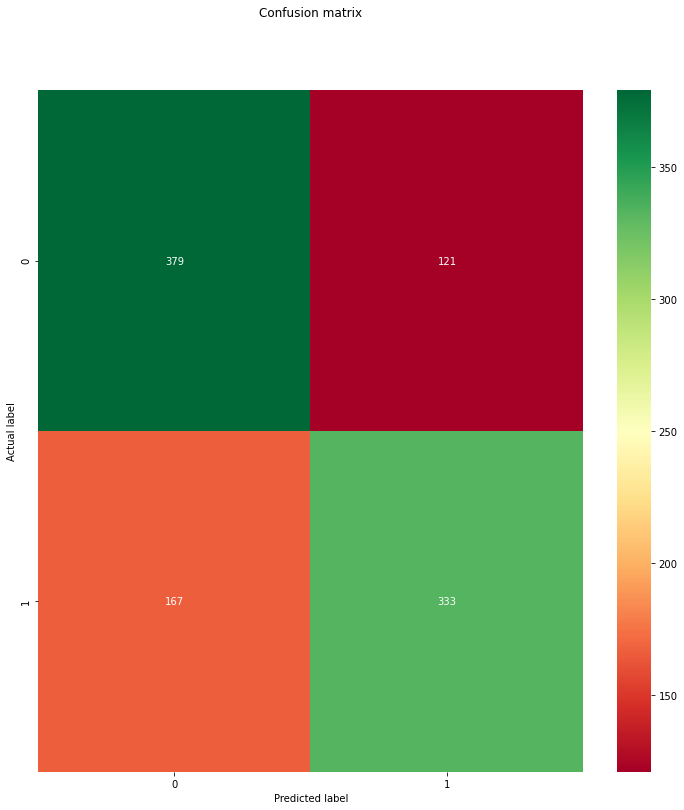

In [33]:
# Visualize the confusion matrix.
class_names=[0,1] # Name  of classes
plt.figure(figsize = (10, 10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap='RdYlGn' , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

- The confusion matrix shows that 379 + 333 are correct predictions while 121 + 168 are incorrect predictions.
- This matches the 71% we obtained from the classification report.

<b>ROC Curve</b>
- The Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. 
- The area under the ROC curve (AUC) represents a binary classifier model's ability to discriminate between the two classes.
- An area of 1.0 represents a model that makes all predictions perfectly.
- If the area is 0.5 the model is as good as random.
- It helps visualize the tradeoff between sensitivity (true positive rate) and specificity (true negative rate).

In [34]:
from sklearn.model_selection import cross_val_score
scoring = 'roc_auc'
results_LR = cross_val_score(logreg, X, y, scoring = scoring)
print('AUC: {} ({})'.format(results_LR.mean(), results_LR.std()))

AUC: 0.83166 (0.01414900703229733)


- The AUC is relatively close to 1 and greater than the 0.5 threshold.
- This indicates a good classifier.
- At this point we have a classifier with acceptable perfomance.
- We can proceed to make predictions.

<b>Prediction on new, hypothetical data</b>
- Let us create an artificial dataset and get the model to predict the classes.

In [35]:
# Predictions on a hypothetical dataset.
new_patients = {'Preg': [0, 2, 2, 4, 1],
                  'Glucose': [102, 123, 100, 140, 157],
                  'BP': [63, 77, 68, 109,120],
                'Age': [23,44,66,31,25],
                  }

pima_df_artificial = pd.DataFrame(new_patients,columns= ['Preg', 'Glucose','BP', 'Age'])
y_pred = logreg.predict(pima_df_artificial)

print ('New patient data: \n', pima_df_artificial)
print ('\nPredicted classes: \n', y_pred)

New patient data: 
    Preg  Glucose   BP  Age
0     0      102   63   23
1     2      123   77   44
2     2      100   68   66
3     4      140  109   31
4     1      157  120   25

Predicted classes: 
 [0 0 0 1 1]


- Our binary logistic regression model is able to classify the new patient data.
- Keep in mind that this is a hypothetical dataset so we currently cannot calculate the accuracy-we have no ground truth to work with.
- The first three patients will not have diabetes while the last two are predicted to have onset of diabetes.

<b>Exercise</b>
- Now that you are in a position to build your own classifier, try the following:
    1. Use downsampling to balance the dataset classes.
    2. Proceed to build a binary LR classifier.
    3. Measure its performance using the metrics you encountered above.
    4. Try to build another binary classifier using a different dataset (check Kaggle for some datasets or any other data source of your choice.)
- It is important to take note of the versions of the libraries and other modules you use in your work.
- This helps in reproducing the results and also in code refactoring and development should a library be deprecated, etc.
- Keep practicing.